# Working with multiclass classification

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_data , train_labels) , (test_data , test_labels) = fashion_mnist.load_data()

In [3]:
print(f"Training data:\n{train_data[0]}\n")
print(f"training labels:\n{train_labels[0]}\n")

Training data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

In [4]:
import matplotlib.pyplot as plt

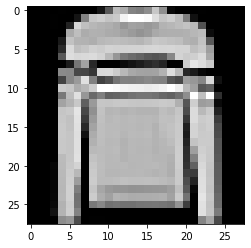

In [5]:
plt.imshow(train_data[5],cmap=plt.cm.gist_gray)

In [6]:
class_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

Text(0.5, 1.0, 'Ankle boot')

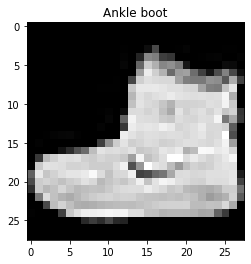

In [7]:
# Plot example image and its label

index = 0
plt.imshow(train_data[index],cmap=plt.cm.gist_gray)
plt.title(class_name[train_labels[index]])

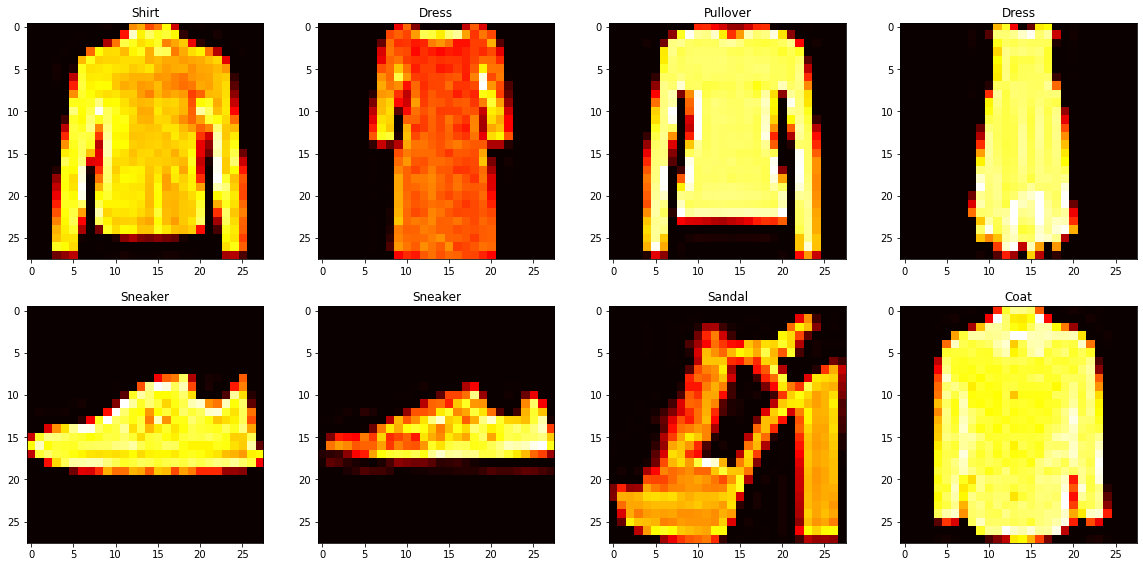

In [60]:
import random
plt.figure(figsize=(20,20))
for i in range(8):
    ax = plt.subplot(4,4,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.hot)
    plt.title(class_name[train_labels[rand_index]])

In [10]:
tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4 ,activation="relu"),
    tf.keras.layers.Dense(4 ,activation="relu"),
    tf.keras.layers.Dense(10 ,activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

non_nom_history = model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 992us/step - loss: 2.0284 - accuracy: 0.1848 - val_loss: 1.7474 - val_accuracy: 0.2699
Epoch 2/10
1875/1875 [==============================] - 2s 854us/step - loss: 1.7005 - accuracy: 0.2691 - val_loss: 1.6672 - val_accuracy: 0.2734
Epoch 3/10
1875/1875 [==============================] - 2s 867us/step - loss: 1.6465 - accuracy: 0.2802 - val_loss: 1.6351 - val_accuracy: 0.2710
Epoch 4/10
1875/1875 [==============================] - 2s 878us/step - loss: 1.6216 - accuracy: 0.2808 - val_loss: 1.6171 - val_accuracy: 0.2823
Epoch 5/10
1875/1875 [==============================] - 2s 907us/step - loss: 1.6073 - accuracy: 0.2832 - val_loss: 1.6020 - val_accuracy: 0.2964
Epoch 6/10
1875/1875 [==============================] - 2s 863us/step - loss: 1.5975 - accuracy: 0.2904 - val_loss: 1.5933 - val_accuracy: 0.2909
Epoch 7/10
1875/1875 [==============================] - 2s 835us/step - loss: 1.5898 - accuracy: 0.3027 - val_loss: 1.5872 -

In [11]:
train_data.max(),test_data.max()

(255, 255)

In [12]:
train_data = train_data/255
test_data = test_data/255

In [13]:
train_data.max(),test_data.max(),train_data.min(),test_data.min()

(1.0, 1.0, 0.0, 0.0)

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["Accuracy"])

nom_history=model_2.fit(train_data,
           train_labels,
           epochs=10,
           validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 933us/step - loss: 1.3747 - Accuracy: 0.4829 - val_loss: 1.0533 - val_Accuracy: 0.6207
Epoch 2/10
1875/1875 [==============================] - 2s 835us/step - loss: 0.9598 - Accuracy: 0.6582 - val_loss: 0.9186 - val_Accuracy: 0.6763
Epoch 3/10
1875/1875 [==============================] - 2s 820us/step - loss: 0.8710 - Accuracy: 0.6830 - val_loss: 0.8522 - val_Accuracy: 0.6992
Epoch 4/10
1875/1875 [==============================] - 2s 855us/step - loss: 0.7950 - Accuracy: 0.7047 - val_loss: 0.7925 - val_Accuracy: 0.7109
Epoch 5/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.7484 - Accuracy: 0.7214 - val_loss: 0.7454 - val_Accuracy: 0.7300
Epoch 6/10
1875/1875 [==============================] - 2s 838us/step - loss: 0.6984 - Accuracy: 0.7449 - val_loss: 0.7045 - val_Accuracy: 0.7426
Epoch 7/10
1875/1875 [==============================] - 2s 833us/step - loss: 0.6634 - Accuracy: 0.7542 - val_loss: 0.6942 -

In [29]:
import pandas as pd

<AxesSubplot:title={'center':'Normalized data'}>

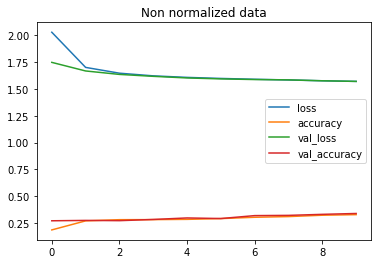

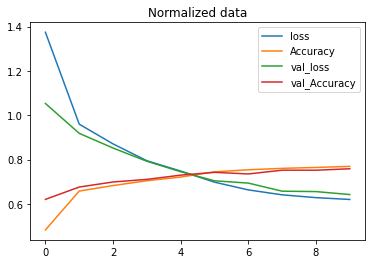

In [30]:
pd.DataFrame(non_nom_history.history).plot(title="Non normalized data")
pd.DataFrame(nom_history.history).plot(title="Normalized data")

# Finding the ideal learning rate

In [31]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["Accuracy"])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))
lr_history=model_3.fit(train_data,train_labels,epochs=40,validation_data=(test_data,test_labels),callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 2s 884us/step - loss: 1.8625 - Accuracy: 0.3747 - val_loss: 1.5553 - val_Accuracy: 0.5116 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 2s 811us/step - loss: 1.3144 - Accuracy: 0.5939 - val_loss: 1.1699 - val_Accuracy: 0.6274 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 2s 809us/step - loss: 1.0600 - Accuracy: 0.6588 - val_loss: 1.0008 - val_Accuracy: 0.6717 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 2s 810us/step - loss: 0.9295 - Accuracy: 0.6852 - val_loss: 0.9003 - val_Accuracy: 0.6902 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 2s 812us/step - loss: 0.8419 - Accuracy: 0.7001 - val_loss: 0.8269 - val_Accuracy: 0.7071 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 2s 811us/step - loss: 0.7758 - Accuracy: 0.7185 - val_loss: 0.7749 - val_Accuracy: 0.7183 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [

Text(0.5, 1.0, 'learning rate vs loss')

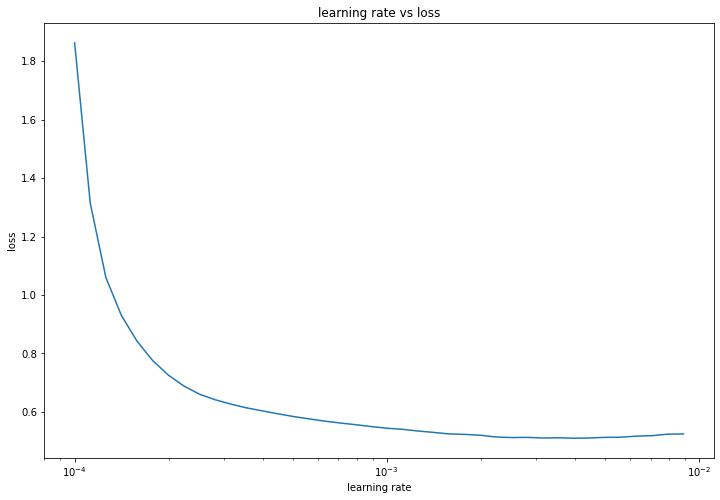

In [33]:
lrs = 1e-4 * (10 ** (tf.range(40) / 20))
plt.figure(figsize=(12,8))
plt.semilogx(lrs, lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [34]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
               metrics=["Accuracy"])

history=model_4.fit(train_data,
           train_labels,
           epochs=20,
           validation_data=(test_data,test_labels))

Epoch 1/20
1875/1875 [==============================] - 2s 935us/step - loss: 1.0127 - Accuracy: 0.6273 - val_loss: 0.7737 - val_Accuracy: 0.7277
Epoch 2/20
1875/1875 [==============================] - 2s 816us/step - loss: 0.7334 - Accuracy: 0.7401 - val_loss: 0.7194 - val_Accuracy: 0.7520
Epoch 3/20
1875/1875 [==============================] - 2s 841us/step - loss: 0.6842 - Accuracy: 0.7591 - val_loss: 0.6757 - val_Accuracy: 0.7638
Epoch 4/20
1875/1875 [==============================] - 2s 826us/step - loss: 0.6608 - Accuracy: 0.7683 - val_loss: 0.6630 - val_Accuracy: 0.7730
Epoch 5/20
1875/1875 [==============================] - 2s 814us/step - loss: 0.6457 - Accuracy: 0.7715 - val_loss: 0.6527 - val_Accuracy: 0.7688
Epoch 6/20
1875/1875 [==============================] - 2s 806us/step - loss: 0.6328 - Accuracy: 0.7752 - val_loss: 0.6433 - val_Accuracy: 0.7700
Epoch 7/20
1875/1875 [==============================] - 2s 807us/step - loss: 0.6250 - Accuracy: 0.7774 - val_loss: 0.6730 -

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
y_prob = model_4.predict(test_data)
y_prob

313/313 [==============================] - 0s 555us/step


array([[5.2379011e-07, 5.4484490e-12, 1.9792699e-10, ..., 1.0380511e-01,
        3.0089129e-02, 5.7588691e-01],
       [9.7974017e-04, 5.5671237e-08, 3.3388418e-01, ..., 1.8084463e-30,
        5.1376148e-04, 1.7243608e-16],
       [4.4523608e-06, 9.9819607e-01, 1.7911292e-03, ..., 0.0000000e+00,
        1.3020966e-15, 5.1616736e-30],
       ...,
       [1.0995820e-02, 7.1124603e-05, 1.3247821e-03, ..., 5.0642489e-12,
        7.0541435e-01, 2.2202214e-04],
       [1.3459856e-03, 9.6652067e-01, 2.4885157e-02, ..., 0.0000000e+00,
        2.4399180e-09, 1.2814352e-20],
       [1.8974165e-04, 8.3735820e-08, 3.9832457e-06, ..., 4.6526104e-02,
        2.7732512e-02, 8.1587266e-03]], dtype=float32)

In [38]:
y_preds = y_prob.argmax(axis=1)
y_preds

array([9, 4, 1, ..., 8, 1, 5], dtype=int64)

In [39]:
confusion_matrix(y_true=test_labels,
                y_pred=y_preds)

array([[759,  39,  25,  84,   2,   8,  72,   0,  11,   0],
       [  3, 944,  15,  22,   2,   0,  13,   0,   1,   0],
       [ 11,  13, 722,  10, 164,   0,  76,   0,   4,   0],
       [ 39,  30,  14, 774,  30,   2, 102,   0,   7,   2],
       [  1,   2, 135,  26, 749,   0,  81,   0,   6,   0],
       [  0,   0,   0,   1,   0, 890,   3,  51,  15,  40],
       [161,  18, 141,  80, 232,  10, 333,   0,  25,   0],
       [  0,   0,   0,   0,   0,  67,   0, 877,   2,  54],
       [  0,   0,   7,  10,   8,  14,  73,   4, 881,   3],
       [  1,   0,   0,   4,   0,  29,   0,  35,   7, 924]], dtype=int64)

In [40]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [41]:
# to make the confusion matrix prettier 


import itertools
import numpy as np

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(15,15),text_size=15):

# Create the confusion matrix
    cm = confusion_matrix(test_labels, y_preds)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]


    fig, ax = plt.subplots(figsize=figsize)

    cax = ax.matshow(cm, cmap=plt.cm.Blues) 
    fig.colorbar(cax)

    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])


    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)


    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()


    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)


    threshold = (cm.max() + cm.min()) / 2.


    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
               horizontalalignment="center",
               color="white" if cm[i, j] > threshold else "black",
               size=text_size)

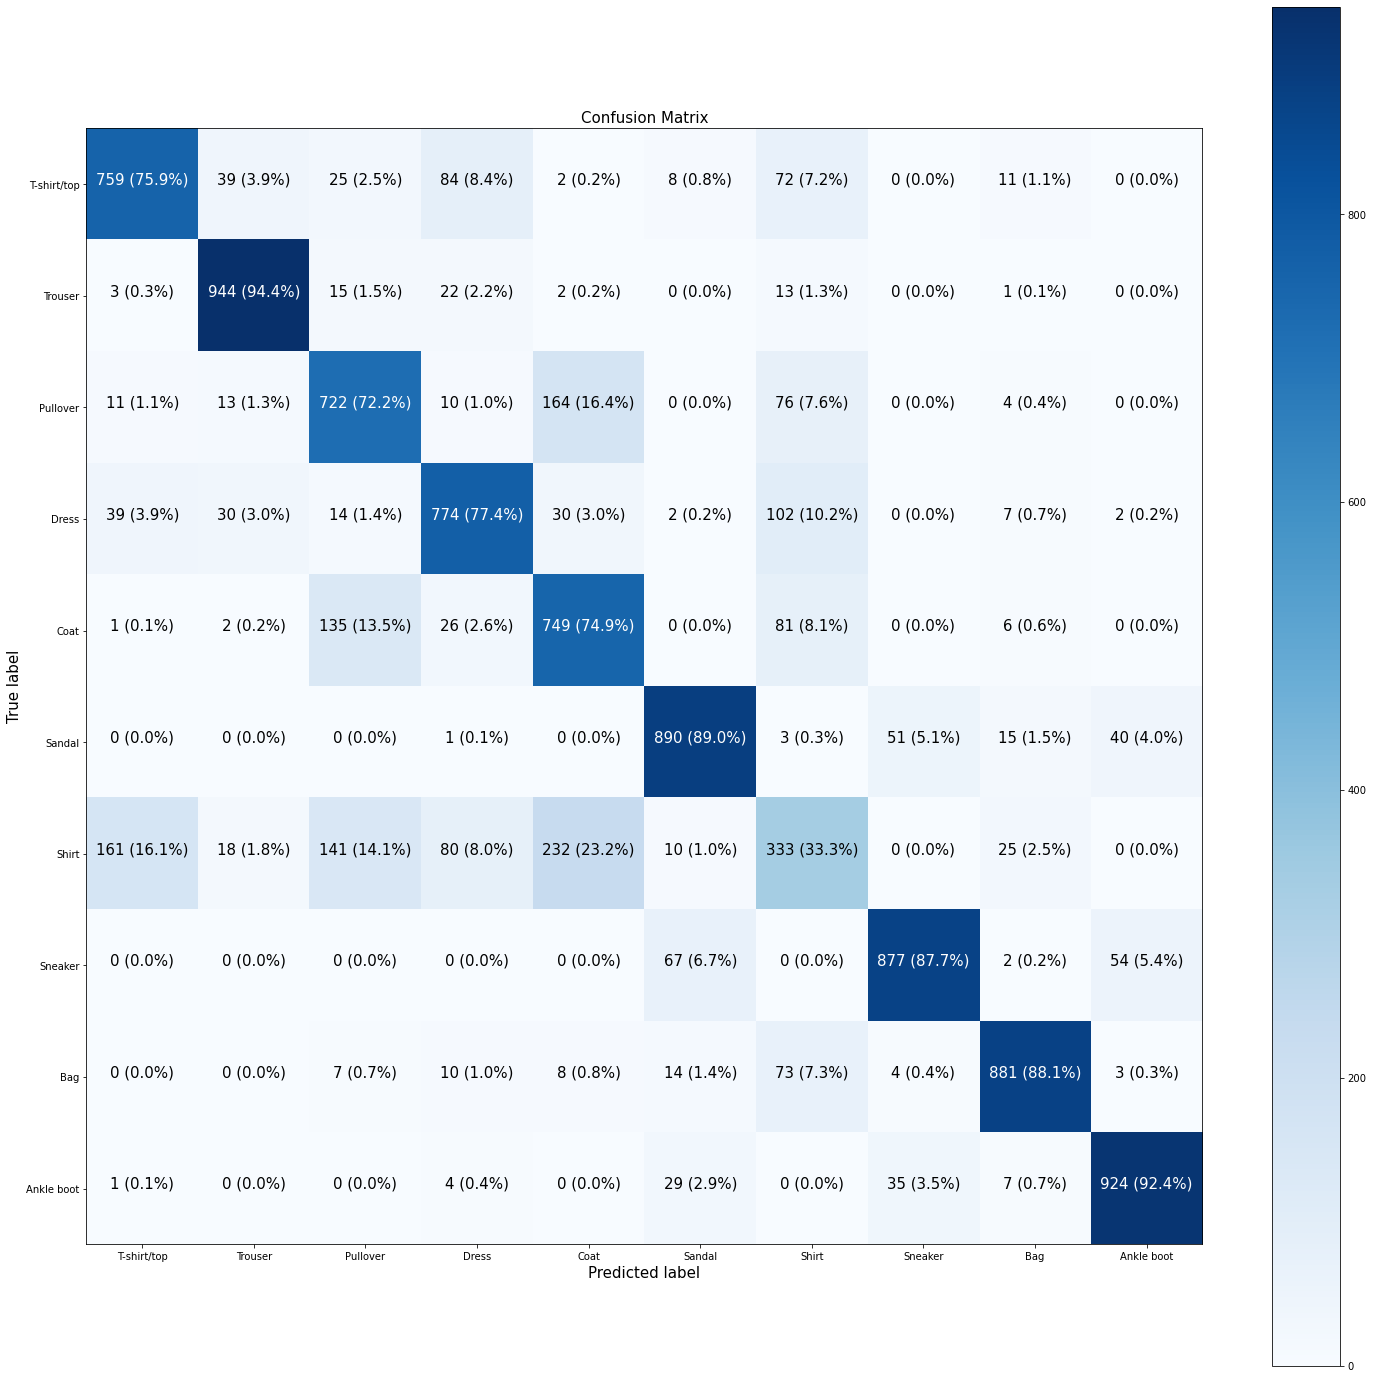

In [42]:
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,classes=class_name,figsize=(25,25),text_size=15)

In [43]:
import random

def plot_random_image(model,images,true_labels,classes):
    i = random.randint(0,len(images))
    
    #create predicition and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    #plot the image
    plt.imshow(target_image,cmap=plt.cm.hot)
    
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    plt.xlabel("pred: {} {}% (True:{})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                  true_label),
                                                  color=color)

1/1 [==============================] - 0s 13ms/step


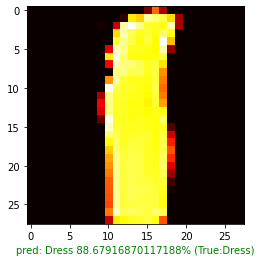

In [58]:
plot_random_image(model=model_4,
                 images=test_data,
                 true_labels=test_labels,
                 classes=class_name)